<a href="https://colab.research.google.com/github/DiAnCaceres/Minor-Machine-Learning/blob/main/ML_Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd # amnipulacion de datos
import numpy as np # parte numerica
import matplotlib.pyplot as plt # visualizacion grafica
import seaborn as sns # mejora graficas, paletas de colores
# sklearn kit cientifico con mnodulos de machile learning.
from sklearn.model_selection import train_test_split # divide conjuntos de entrenamiento y validacione
from sklearn.preprocessing import StandardScaler # preprocesamiento de datos, en particular estandarizacion de datos.
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier # algoritmo knn propiamente tal
from sklearn.metrics import confusion_matrix # matrices de confusión para analizar los resultados de los clasificadores
from sklearn.metrics import f1_score # tuvimos una métrica en particular que se conoce como score f1
from sklearn.metrics import accuracy_score # esta es la métrica por excelencia, denominada certeza en españ

In [229]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:

penguin = pd.read_csv(
    '/content/drive/MyDrive/penguins_size.csv' # se lee el archivo csv desde mi cuenta de drive
)

In [232]:
penguin.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [233]:
missing = missing_values_table(penguin) # se ocupa la funcion missing values para mostrar cuantos valores faltan
missing


Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [234]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median 
penguin.iloc[:,:] = imputer.fit_transform(penguin)

In [235]:
penguin.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [236]:
penguin.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [237]:
#debido a que el standar scaler no recibe strings, se pasaran las columnas island y sex a un tipo int
lb = LabelEncoder()
penguin["island"] = lb.fit_transform(penguin["island"])

lb = LabelEncoder()
penguin["sex"] = lb.fit_transform(penguin["sex"])
penguin

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
3,Adelie,2,41.1,17.0,190.0,3800.0,2
4,Adelie,2,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,0,41.1,17.0,190.0,3800.0,2
340,Gentoo,0,46.8,14.3,215.0,4850.0,1
341,Gentoo,0,50.4,15.7,222.0,5750.0,2
342,Gentoo,0,45.2,14.8,212.0,5200.0,1


In [238]:
X= penguin.iloc[:, 1:7] #tomamos todos los datos menos las especies
y= penguin.iloc[:, 0] #tomamos solo la columna de las especies que nos va a servir de label en nuestra busqueda informada


In [239]:
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [240]:
X.head()


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,41.1,17.0,190.0,3800.0,2
4,2,36.7,19.3,193.0,3450.0,1


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3) #se entrena el modelo


In [242]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

240
240
104
104


In [243]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Predicciones

In [244]:
clasificador = KNeighborsClassifier(n_neighbors=10, p=2,metric='euclidean') 


In [245]:
clasificador.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [246]:
y_pred = clasificador.predict(X_test)
y_pred

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 

In [247]:
cm = confusion_matrix(y_test, y_pred) #creamos la matriz de confusion para visualizar los resultados
print (cm)

[[50  1  0]
 [ 0 16  0]
 [ 0  0 37]]


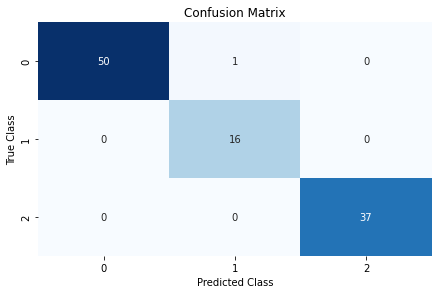

In [248]:
sns.heatmap(cm, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show() 

In [249]:
print(accuracy_score(y_test, y_pred)) #imprimimos el accuracy


0.9903846153846154


## Cross validation

In [250]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clasificador, X, y, cv=10) #cross-validation 10-fold

In [251]:
scores.mean() #media

0.7824369747899159